In [174]:
import pandas as pd
import threading
import requests
import time
import os
import datetime
import re
import string
import random
import numpy as np
import seaborn as sns ; sns.set_theme(color_codes=True)
from web3 import Web3
from hexbytes import HexBytes

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from IPython.core.interactiveshell import InteractiveShell
pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)

RD = '/home/team_defi/02_rdata/'
WD = '/home/team_defi/03_wdata/'
RES = '/home/team_defi/04_result/'
InteractiveShell.ast_node_interactivity = 'all'

In [175]:
df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy_ret.csv')
df = buy(df=df)
df['chain'].value_counts()

/tmp/ipykernel_4034992/2934940777.py:1: DtypeWarning: Columns (4,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy_ret.csv')


ethereum     13690
avalanche     1864
binance       1637
Name: chain, dtype: int64

In [176]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'])
dfs = []

for idx, row in df.drop_duplicates(['insider_contractAddress']).iterrows():
    chain = row['chain']
    insider_contractAddress = row['insider_contractAddress']
    first_day = pd.to_datetime(token_first_day(contract=insider_contractAddress,
                                               chain=chain))
    ten_day = pd.to_datetime(first_day + datetime.timedelta(days=9))
    
    dfs.append(df.loc[(df['insider_contractAddress'] == insider_contractAddress)&
                      (df['date'] > ten_day)])
    
dfs = pd.concat(dfs)
dfs

,Unnamed: 0,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_layer_one,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3,date
0,0,4716.034753,0x32e202a99c5e6b2903a42091a18275f7b569e74691619068d558c48b8e673273#35108,128,0x019ab937d61c50ef3d403b284ab8cb97ea432e5b,0xe592427a0aece92de3edee1f18e0157c05861564,0xe592427a0aece92de3edee1f18e0157c05861564,5793943713510455061261008,-190476.0,2021-12-01 09:28:17,Tiger King,Wrapped Ether,0x24e89bdf2f65326b94e36978a7edeac63623dafa,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x32e202a99c5e6b2903a42091a18275f7b569e74691619068d558c48b8e673273,0.000000,1.863489e+08,1.000000,0.000000,True,uniswapv3_ethereum,ethereum,0x019ab937d61c50ef3d403b284ab8cb97ea432e5b,0x24e89bdf2f65326b94e36978a7edeac63623dafa,NaN,NaN,False,-4716.034753,0.326814,0.704352,0.579658,-0.227660,-0.206918,-0.207739,2021-12-01
1,1,3440.269325,0x61557173b7915909aa7a59a498df0b95ae81a7eb9f96c1ef383d7f741d6f2d54#4159,238,0x019ab937d61c50ef3d403b284ab8cb97ea432e5b,0xe592427a0aece92de3edee1f18e0157c05861564,0xe592427a0aece92de3edee1f18e0157c05861564,5882669073238910139704757,-190172.0,2021-10-03 21:55:41,Tiger King,Wrapped Ether,0x24e89bdf2f65326b94e36978a7edeac63623dafa,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x61557173b7915909aa7a59a498df0b95ae81a7eb9f96c1ef383d7f741d6f2d54,0.000000,1.830577e+08,1.012638,0.000000,True,uniswapv3_ethereum,ethereum,0x019ab937d61c50ef3d403b284ab8cb97ea432e5b,0x24e89bdf2f65326b94e36978a7edeac63623dafa,NaN,NaN,False,-3440.269325,-0.034993,0.099368,0.074746,0.000526,0.194375,0.378556,2021-10-03
2,2,13438.549182,0x65f59004c63eb6a050bb0f07b487d2fb4136093ad21c1a48523dc7250a4d871a#35267,218,0x019ab937d61c50ef3d403b284ab8cb97ea432e5b,0xe592427a0aece92de3edee1f18e0157c05861564,0xe592427a0aece92de3edee1f18e0157c05861564,5410753122161088461152041,-191844.0,2021-12-02 09:16:46,Tiger King,Wrapped Ether,0x24e89bdf2f65326b94e36978a7edeac63623dafa,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x65f59004c63eb6a050bb0f07b487d2fb4136093ad21c1a48523dc7250a4d871a,0.000000,6.177180e+08,2.930439,0.000000,True,uniswapv3_ethereum,ethereum,0x019ab937d61c50ef3d403b284ab8cb97ea432e5b,0x24e89bdf2f65326b94e36978a7edeac63623dafa,NaN,NaN,False,-13438.549182,0.377538,0.252844,0.038963,-0.303409,-0.531069,-0.510327,2021-12-02
3,3,4739.261742,0x68820692482be09c9ad2f35fa77d56c8531bf2aeb1a252071ac8660fa81522bc#35061,246,0x019ab937d61c50ef3d403b284ab8cb97ea432e5b,0xe592427a0aece92de3edee1f18e0157c05861564,0xe592427a0aece92de3edee1f18e0157c05861564,5253779681341213786251129,-192433.0,2021-12-01 04:39:35,Tiger King,Wrapped Ether,0x24e89bdf2f65326b94e36978a7edeac63623dafa,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x68820692482be09c9ad2f35fa77d56c8531bf2aeb1a252071ac8660fa81522bc,0.000000,2.264885e+08,1.000000,0.000000,True,uniswapv3_ethereum,ethereum,0x019ab937d61c50ef3d403b284ab8cb97ea432e5b,0x24e89bdf2f65326b94e36978a7edeac63623dafa,NaN,NaN,False,-4739.261742,0.326814,0.704352,0.579658,-0.227660,-0.206918,-0.207739,2021-12-01
4,4,9395.642762,0x6b4738f70a48c925508c064b9b25c59b602a8b0bca40234888a74f16456204cd#35008,503,0x019ab937d61c50ef3d403b284ab8cb97ea432e5b,0xe592427a0aece92de3edee1f18e0157c05861564,0xe592427a0aece92de3edee1f18e0157c05861564,5536282705617953147498033,-191385.0,2021-12-01 01:28:24,Tiger King,Wrapped Ether,0x24e89bdf2f65326b94e36978a7edeac63623dafa,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x6b4738f70a48c925508c064b9b25c59b602a8b0bca40234888a74f16456204cd,0.000000,4.053603e+08,2.000000,0.000000,True,uniswapv3_ethereum,ethereum,0x019ab937d61c50ef3d403b284ab8cb97ea432e5b,0x24e89bdf2f65326b94e36978a7edeac63623dafa,NaN,NaN,False,-9395.642762,0.326814,0.704352,0.579658,-0.227660,-0.206918,-0.207739,2021-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [181]:
df = dfs.copy()
# df = df.loc[df['amountUSD'] > 1000]

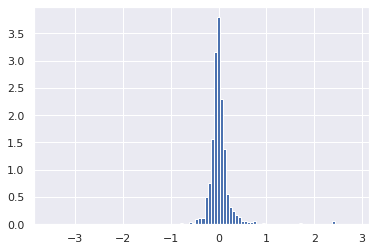

count    10828.000000
mean         0.013229
std          0.260633
min         -3.536311
25%         -0.079601
50%         -0.013418
75%          0.062895
max          2.823637
Name: ret_-1, dtype: float64

In [191]:
ret_class = 'ret_-1'
dfg = df.copy()

fig, ax = plt.subplots()

_ = ax.hist(dfg[ret_class].values, bins=100, density=True)
plt.show()

dfg[ret_class].describe()

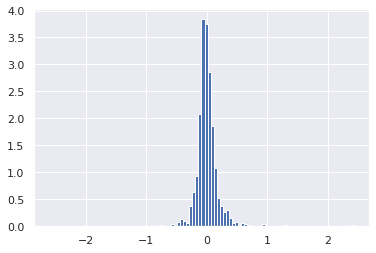

count    6311.000000
mean       -0.000512
std         0.189201
min        -2.598044
25%        -0.075215
50%        -0.018466
75%         0.060833
max         2.420997
Name: ret_-1, dtype: float64

In [192]:
dfg = df.loc[(df['buy']>0)]

buy = dfg['buy'].values
ret = dfg[ret_class].values

fig, ax = plt.subplots()

_ = ax.hist(ret,bins=100, density=True)
plt.show()

df.loc[(df['buy'] >0)][ret_class].describe()

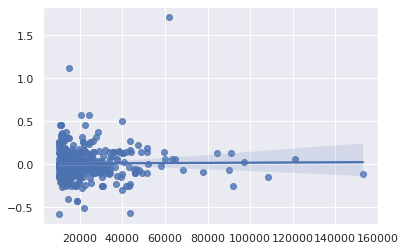

In [156]:
ax = sns.regplot(x=buy, y=ret)

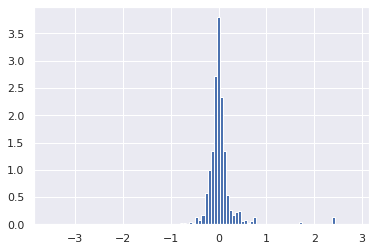

count    4517.000000
mean        0.032426
std         0.334976
min        -3.536311
25%        -0.086068
50%        -0.009789
75%         0.066438
max         2.823637
Name: ret_-1, dtype: float64

In [193]:
dfg = df.loc[(df['buy']<0)]

buy = dfg['buy'].values
ret = dfg[ret_class].values

fig, ax = plt.subplots()

_ = ax.hist(ret,bins=100, density=True)
plt.show()

df.loc[(df['buy'] <0)][ret_class].describe()

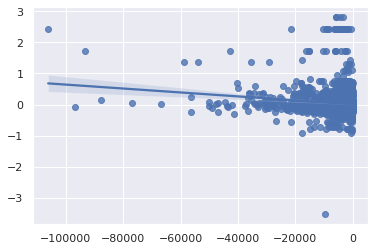

In [171]:
ax = sns.regplot(x=buy, y=ret)

# Check

In [78]:
df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy_ret.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values('timestamp', ascending=True, inplace=True)
df.loc[df['insider_contractAddress'] == '0x24e89bdf2f65326b94e36978a7edeac63623dafa']['timestamp'].min()

dfs.loc[df['insider_contractAddress'] == '0x24e89bdf2f65326b94e36978a7edeac63623dafa']['timestamp'].min()

/tmp/ipykernel_4034992/636521133.py:1: DtypeWarning: Columns (4,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy_ret.csv')


Timestamp('2021-08-16 09:39:27')

Timestamp('2021-08-26 18:44:14')

In [77]:
token_first_day(contract = '0x24e89bdf2f65326b94e36978a7edeac63623dafa',
                    chain = 'ethereum')

pd.to_datetime(token_first_day(contract = '0x24e89bdf2f65326b94e36978a7edeac63623dafa',
                    chain = 'ethereum')) + datetime.timedelta(days=9)

'2021-08-16'

Timestamp('2021-08-25 00:00:00')

In [37]:
def chain_info(chain):
    dexes = {'ethereum':['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
             'binance':['biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
             'avalanche':['traderjoe_avalanche', 'pangolin_avalanche'],
             'fantom':['spookyswap_fantom', 'spiritswap_fantom'],
             'polygon':['sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']
            }
    
    dex = dexes[chain]
    return dex

def token_first_day(contract, chain):
    
        contractAddress_lower = contract.lower()
        contractAddress_upper = Web3.toChecksumAddress(contractAddress_lower)
        dfs = []
        dex_num = 0

        for dex in chain_info(chain):
            lst = pd.read_csv(f'{WD}/dex_price/list_all/{dex}.csv')
            csv_info = lst.loc[((lst['contractAddress'] == contractAddress_lower)|
                                (lst['contractAddress'] == contractAddress_upper))]
            
            if csv_info['contractAddress'].values[0] == contractAddress_lower:
                contractAddress = contractAddress_lower
            else:
                contractAddress = contractAddress_upper

            status = csv_info['status'].values[0]
            dexn = csv_info['dex'].values[0]

            if status == 0: 
                continue
            elif dexn == 0:
                continue
            else:
                csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 
                csv['dex'] = dex
                dex_num += 1
                dfs.append(csv)
                
        dfs = pd.concat(dfs)
        
        first = dfs['date'].min()

        return first

In [173]:
def buy(df):

    
    for idx, row in df.iterrows():
        index = row['id']
        insider_contractAddress = row['insider_contractAddress'].lower()
        token0_id = row['token0_id'].lower()
        token1_id = row['token1_id'].lower()

        amount0Out = row['amount0Out']
        amount0In = row['amount0In']
        amount1Out = row['amount1Out']
        amount1In = row['amount1In']
        amountUSD = row['amountUSD']

        if insider_contractAddress == token0_id:
            if (amount0In == 0)|(amount1Out == 0):
                df.loc[df['id'] == index, 'buy'] = amountUSD
            else:
                df.loc[df['id'] == index, 'buy'] = - amountUSD

        else:
            if (amount0In == 0)|(amount1Out == 0):
                df.loc[df['id'] == index, 'buy'] = - amountUSD
            else:
                df.loc[df['id'] == index, 'buy'] = amountUSD
            
    return df